 # Load the dataset

In [37]:
main_file = "./dataset/wikivitals-lvl5-04-2022.json"
additional_file = "./dataset/wikivitals-lvl5-04-2022-binary-representations.json"

import json

corpus = {}
with open(main_file, 'r', encoding='utf8') as f:
    for row in f:
        entry = json.loads(row)
        corpus[entry["id"]] = entry
    
with open(additional_file, 'r', encoding='utf8') as add_f:
    for row in add_f:
        entry = json.loads(row)
        corpus[entry["id"]]["binary_features"] = entry["binary_features"]

# Display an entry (Dallasaurus)
for k,v in corpus["10152440"].items():
    print(f"{k}: {v}") 





id: 10152440
abstract: ['Dallasaurus Dallas lizard is a basal mosasauroid from the Upper Cretaceous of North America. Along with Russellosaurus Dallasaurus is one of the two oldest mosasauroid taxa currently known from North America. This small semi aquatic lizard measured less than a meter in length compared to such gigantic derived mosasaurs as Tylosaurus and Mosasaurus each exceeding 14 meters.']
label: ['Biological and health sciences', 'Animals', 'Reptiles']
title: Dallasaurus
headers: ['Specimens', 'Anatomy', 'Classification', 'References', 'Sources']
outcoming_links_filtered: ['800373', '32031', '210294', '554469', '331755', '2051142', '2469649', '38493', '44211', '227807', '166945', '21139', '29810', '585732']
binary_features: ['abs_america', 'abs_aquat', 'abs_basal', 'abs_cretac', 'abs_current', 'abs_deriv', 'abs_known', 'abs_length', 'abs_lizard', 'abs_measur', 'abs_meter', 'abs_north', 'abs_north_america', 'abs_oldest', 'abs_small', 'abs_two', 'hea_classif', 'hea_sourc']


# General statistics

In [38]:
print(f"Number of articles: {len(corpus)}")
directed_edges, undirected_edges = [], []
for id in corpus.keys():
    for target_id in corpus[id]["outcoming_links_filtered"]:
        directed_edges.append((id, target_id))
        undirected_edges.append((id, target_id))
        undirected_edges.append((target_id, id))
undirected_edges = list(set(undirected_edges))
print(f"Number of directed edges: {len(directed_edges)}")
print(f"Number of undirected edges: {len(undirected_edges)}")
list_of_labels_level_0_with_doubles = [corpus[id]["label"][0] for id in corpus.keys()]
list_of_labels_level_0 = list(set(list_of_labels_level_0_with_doubles))
list_of_labels_level_1_with_doubles = [corpus[id]["label"][0] + ' -> ' + corpus[id]["label"][1] for id in corpus.keys()]
list_of_labels_level_1 = list(set(list_of_labels_level_1_with_doubles))
list_of_labels_level_2_with_doubles = [corpus[id]["label"][0] + ' -> ' + corpus[id]["label"][1] + ' ->- ' + corpus[id]["label"][2] for id in corpus.keys()]
list_of_labels_level_2 = list(set(list_of_labels_level_2_with_doubles))
print(f"Number of labels per level of granularity (0: coarse, 1: intermediary, 2: fine): {len(list_of_labels_level_0),len(list_of_labels_level_1), len(list_of_labels_level_2)}")


Number of articles: 48512
Number of directed edges: 2297782
Number of undirected edges: 4132534
Number of labels per level of granularity (0: coarse, 1: intermediary, 2: fine): (11, 32, 251)


# Hierarchy of labels (and number of articles)

In [39]:
from collections import Counter

labels_0 = Counter(list_of_labels_level_0_with_doubles)
labels_1 = Counter(list_of_labels_level_1_with_doubles)
labels_2 = Counter(list_of_labels_level_2_with_doubles)
all_labels = labels_0|labels_1|labels_2
for k in sorted(list(all_labels.keys())):
    indent = k.count('>') * '\t'
    label = k.split('>')[-1].strip('- ')
    print(indent+label+' ('+str(all_labels[k])+')')


Arts (3310)
	Arts (3310)
		Architecture (249)
		Cultural venues (131)
		Fictional characters (134)
		General (5)
		Literature (989)
		Modern visual arts (301)
		Music (803)
		Performing arts (198)
		Visual arts (500)
Biological and health sciences (4681)
	Animals (2396)
		Agnatha (17)
		Amphibians (55)
		Animal breeds and hybrids (149)
		Arachnids (52)
		Arthropoda, others (35)
		Birds (382)
		Cnidarians (22)
		Crustaceans (84)
		Echinoderms (15)
		Fishes (299)
		General classifications (13)
		Individual animals (94)
		Insects (196)
		Invertebrata, others (52)
		Mammals (539)
		Mollusks (69)
		Porifera (5)
		Proto-mammals (18)
		Reptiles (297)
		Reptiliomorphs (3)
	Biology (886)
		Anatomy and morphology (267)
		Biochemistry and molecular biology (160)
		Biological processes and physiology (111)
		Biology basics (47)
		Botany (9)
		Cell biology (78)
		Ecology (39)
		Evolutionary biology (92)
		Genetics (41)
		Zoology (42)
	Health (791)
		Drugs and medication (121)
		Health and fitness (

# Features

In [40]:
tmp = set()
for id in corpus.keys():
    tmp = tmp.union(set(corpus[id]["binary_features"])) 
list_of_all_features = sorted(list(tmp))
total_number_features = len(list_of_all_features)
print(f"Total number of features: {total_number_features}")

Total number of features: 4000


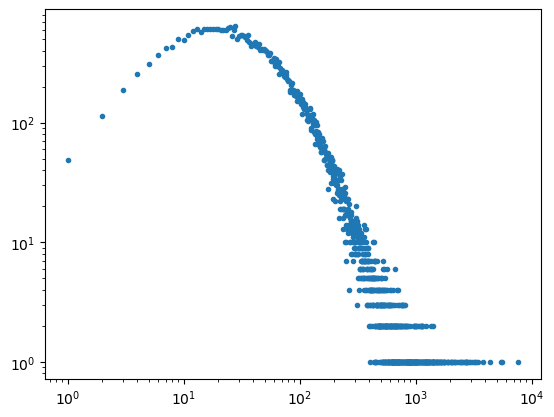

In [45]:
from matplotlib.pyplot import loglog

undirected_edges_counter = {id: 0 for id in corpus.keys()}

for (id,_) in undirected_edges:
    undirected_edges_counter[id] += 1
edge_counter = Counter(list(undirected_edges_counter.values()))
x = list(edge_counter.keys())
y = list(edge_counter.values())

loglog(x,y, marker='.', linestyle='none')
